In [1]:
from __future__ import unicode_literals

import numpy as np
import scipy as sp
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
import matplotlib
import matplotlib.font_manager as fm

fm._rebuild()
matplotlib.rc('font', family='D2Coding')

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
df = pd.concat([dfX, dfy], axis=1)

In [4]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [5]:
t = df.loc[:,'MEDV']

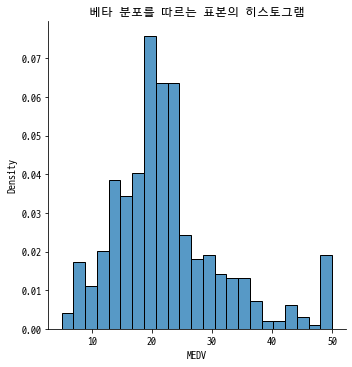

In [6]:
sns.displot(t, kde=False, stat='density')#, norm_hist=True)
plt.title("베타 분포를 따르는 표본의 히스토그램")
plt.show()

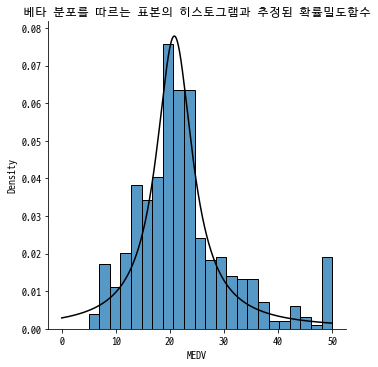

In [7]:
# matplotlib.rc('font', family='D2Coding')

# np.random.seed(0)
f = sp.stats.cauchy
x = f.fit(t)

xx = np.linspace(0, 50, 1000)
sns.displot(t, stat='density')
plt.plot(xx, f(*x).pdf(xx), 'k')
plt.title("베타 분포를 따르는 표본의 히스토그램과 추정된 확률밀도함수")
plt.show()

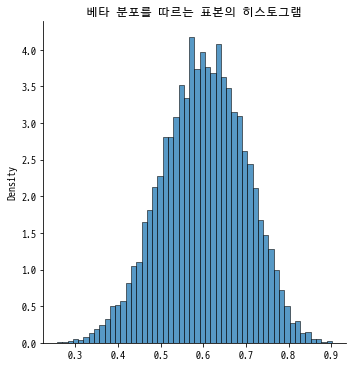

In [8]:
# matplotlib.rc('font', family='D2Coding')

# np.random.seed(0)
x = sp.stats.beta(15, 10).rvs(10000)

sns.displot(x, stat='density')
plt.title("베타 분포를 따르는 표본의 히스토그램")
plt.show()

In [9]:
def estimate_beta(x):
    x_bar = x.mean()
    s2 = x.var()
    a = x_bar * (x_bar * (1 - x_bar) / s2 - 1)
    b = (1 - x_bar) * (x_bar * (1 - x_bar) / s2 - 1)
    return a, b


params = estimate_beta(x)
print(params)

(14.595229965153534, 9.721187029979747)


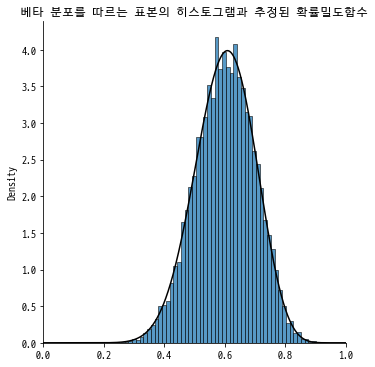

In [10]:
xx = np.linspace(0, 1, 1000)
sns.displot(x, kde=False, stat='density')
plt.plot(xx, sp.stats.beta(params[0], params[1]).pdf(xx), 'k')
plt.xlim(0, 1)
plt.title("베타 분포를 따르는 표본의 히스토그램과 추정된 확률밀도함수")
plt.show()